## Program 1: Dimensionality Reduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Loading MNIST dataset

In [2]:
from keras.datasets import mnist

In [3]:
(train_X, train_y ), (test_X, test_y ) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print('X_train: ' + str(train_X.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_train: ' + str(train_y.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
X_test:  (10000, 28, 28)
Y_train: (60000,)
Y_test:  (10000,)


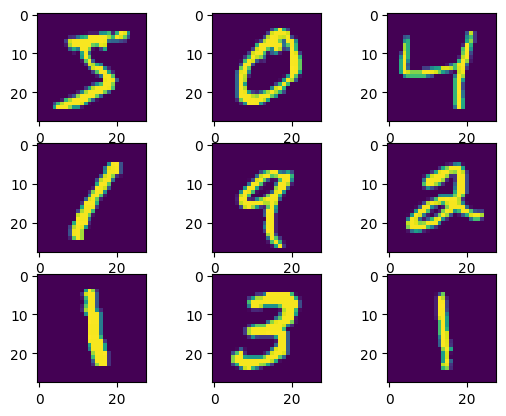

In [5]:
# Ploting some dataset from MNSIT
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_X[i])

In [6]:
print(train_X[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [7]:
print(train_y[1])

0


In [8]:
train_images = train_X.reshape((train_X.shape[0], 784))
test_images = test_X.reshape((test_X.shape[0], 784))

In [9]:
print('X_train: ' + str(train_images.shape))
print('X_test:  '  + str(test_images.shape))

X_train: (60000, 784)
X_test:  (10000, 784)


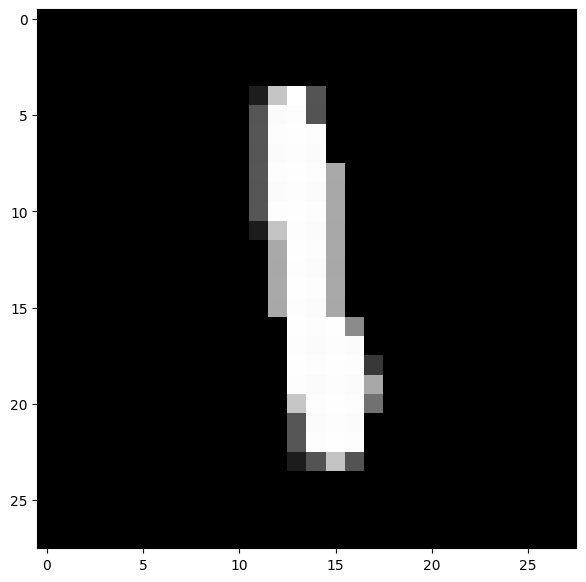

In [10]:
plt.figure(figsize=(7,7))
ind = 200

grid_data = train_images[ind].reshape(28, 28)
plt.imshow(grid_data, cmap='gray')
plt.show()

In [11]:
# Data Preprocessing - Standardizing the data

from sklearn.preprocessing import StandardScaler

train_images = StandardScaler().fit_transform(train_images)
test_images = StandardScaler().fit_transform(test_images)

print('X_train: ' + str(train_images.shape))
print('X_test:  '  + str(test_images.shape))

X_train: (60000, 784)
X_test:  (10000, 784)


In [12]:
import tensorflow
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

Autoencoder Class

In [13]:
latent_dim = 2 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tensorflow.keras.Sequential([
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tensorflow.keras.Sequential([
      layers.Dense(784, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [14]:
# 784 -> 2 for visualization

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [15]:
autoencoder.fit(train_images, train_images,
                epochs=100,
                shuffle=True,
                validation_data=(test_images, test_images))

Epoch 1/100
1875/1875 [==============================] - 13s 6ms/step - loss: 0.9124 - val_loss: 0.8200
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8745 - val_loss: 0.8061
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8630 - val_loss: 0.7981
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8568 - val_loss: 0.7939
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8532 - val_loss: 0.7916
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8508 - val_loss: 0.7898
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8490 - val_loss: 0.7886
Epoch 8/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8478 - val_loss: 0.7871
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8468 - val_loss: 0.7866
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step -

In [16]:
encoded_imgs = autoencoder.encoder(test_images).numpy()

In [17]:
encoded_imgs.shape

(10000, 2)

In [18]:
dataframe = pd.DataFrame(data=encoded_imgs)

dataframe.head()

,0,1
0,92.450836,67.142937
1,0.000000,0.000000
2,6.553251,12.670363
3,0.117502,8.358503
4,9.256540,5.629207


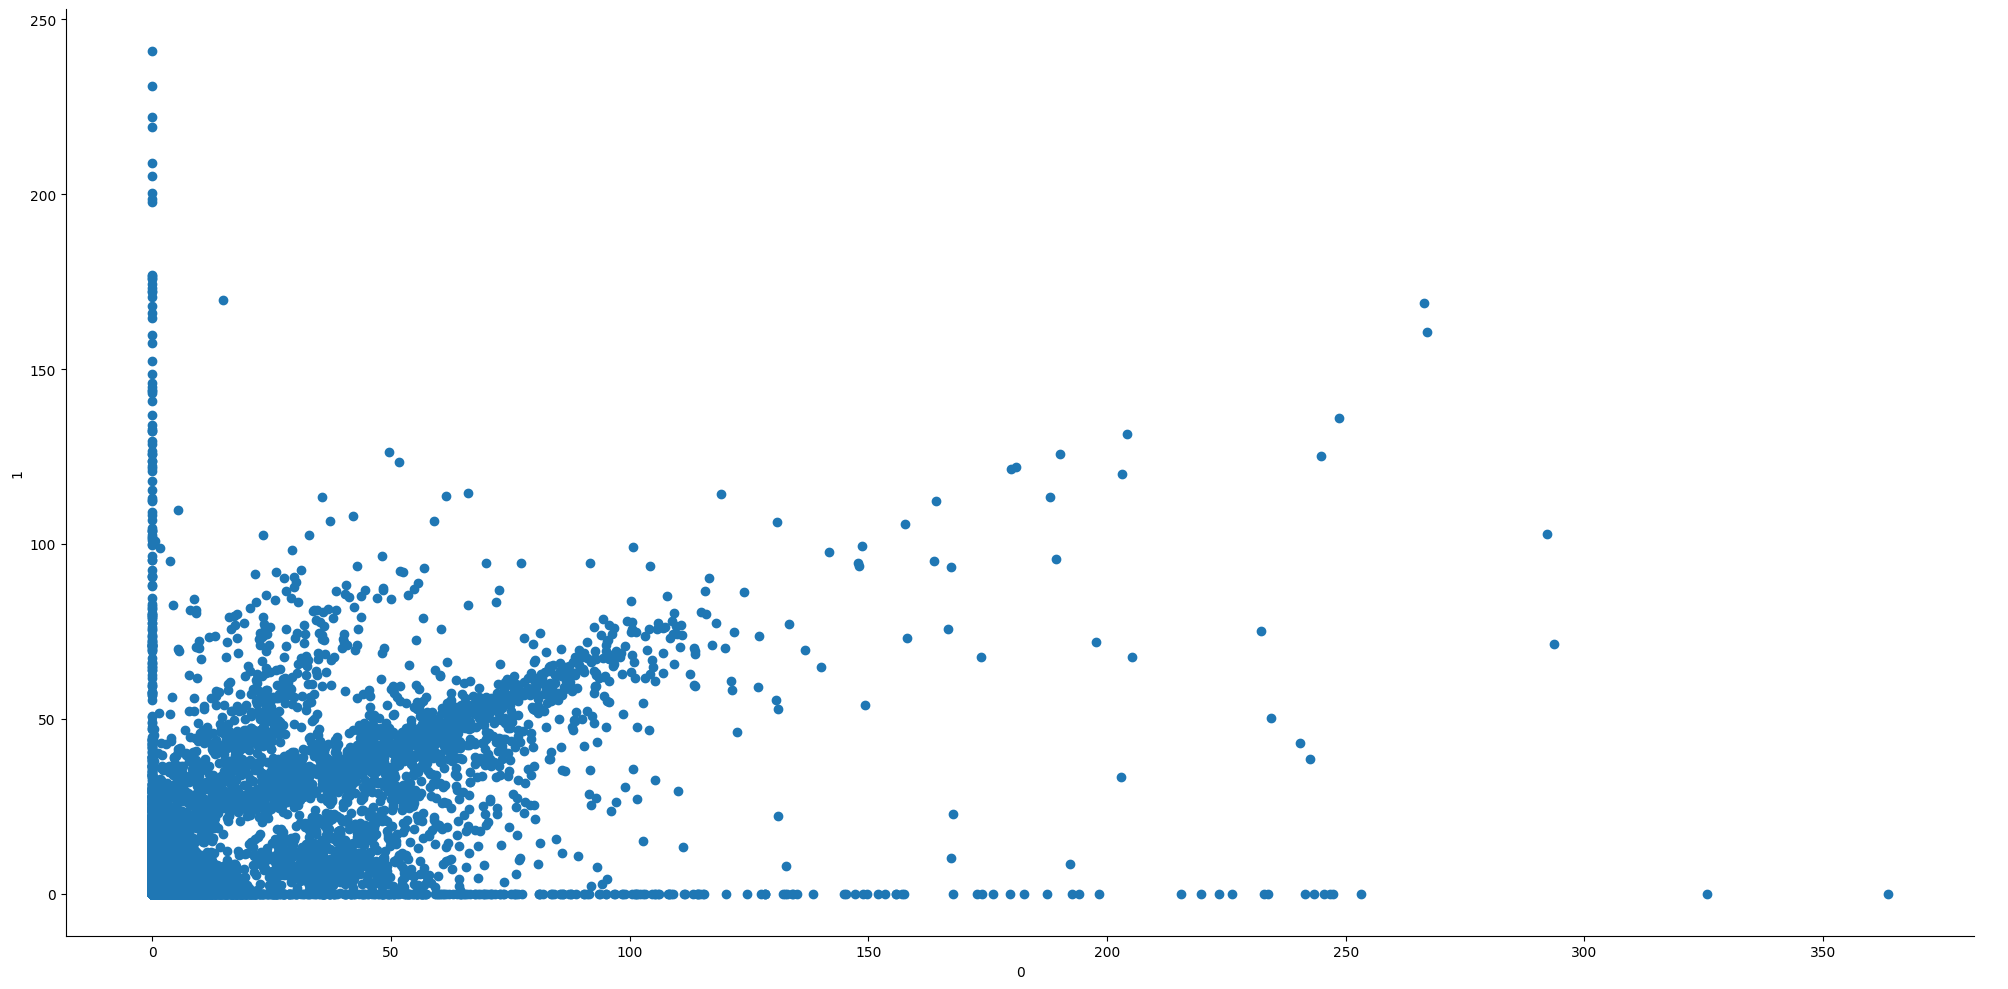

In [19]:
# # Plotting encoded 2-D images using Scatter plot
import seaborn as sns

sns.FacetGrid(dataframe, height=10, aspect=2).map(plt.scatter, 0, 1).add_legend()

plt.show()

In [57]:
# 784 -> X (X = 64)
latent_dim = 64
autoencoder = Autoencoder(latent_dim)

ValueError: ignored

In [21]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [22]:
autoencoder.fit(train_images, train_images,
                epochs=100,
                shuffle=True,
                validation_data=(test_images, test_images))

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6976 - val_loss: 0.5960
Epoch 2/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6491 - val_loss: 0.5844
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6404 - val_loss: 0.5789
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6359 - val_loss: 0.5759
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6334 - val_loss: 0.5744
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6320 - val_loss: 0.5734
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6311 - val_loss: 0.5727
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6304 - val_loss: 0.5724
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6299 - val_loss: 0.5718
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step -

In [23]:
encoded_imgs = autoencoder.encoder(test_images).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

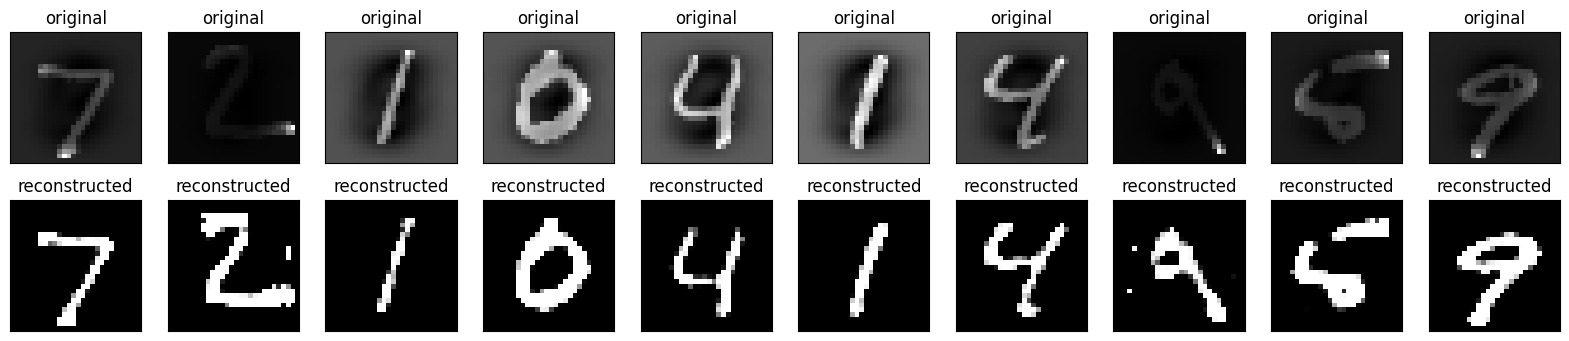

In [24]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(test_images[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
encode_train_X = autoencoder.encoder(train_images).numpy()
encode_test_X = encoded_imgs

In [26]:
print('X_train_encoded: ' + str(encode_train_X.shape))
print('X_test_encoded:  '  + str(encode_test_X.shape))

X_train_encoded: (60000, 64)
X_test_encoded:  (10000, 64)


## Program 2: Image Classification Task

In [27]:
from tensorflow.keras import layers, models

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(layers.MaxPooling2D((2, 2)))

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                18496     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
__________________________________________________

In [32]:
model.compile(optimizer='adam',
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(encode_train_X.reshape((len(encode_train_X), 8, 8)), train_y, epochs=10, 
                    validation_data=(encode_test_X.reshape((len(encode_test_X), 8, 8)), test_y))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 9s 4ms/step - loss: 0.5263 - accuracy: 0.8360 - val_loss: 0.3513 - val_accuracy: 0.8919
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3066 - accuracy: 0.9064 - val_loss: 0.2949 - val_accuracy: 0.9097
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2591 - accuracy: 0.9202 - val_loss: 0.2439 - val_accuracy: 0.9258
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2285 - accuracy: 0.9283 - val_loss: 0.2341 - val_accuracy: 0.9303
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2033 - accuracy: 0.9366 - val_loss: 0.2265 - val_accuracy: 0.9328
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1894 - accuracy: 0.9408 - val_loss: 0.2347 - val_accuracy: 0.9344
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1740 - accuracy: 0.9459 - val_loss: 0.2282 - val_accuracy: 0.9334
Ep

313/313 - 1s - loss: 0.2219 - accuracy: 0.9377 - 684ms/epoch - 2ms/step


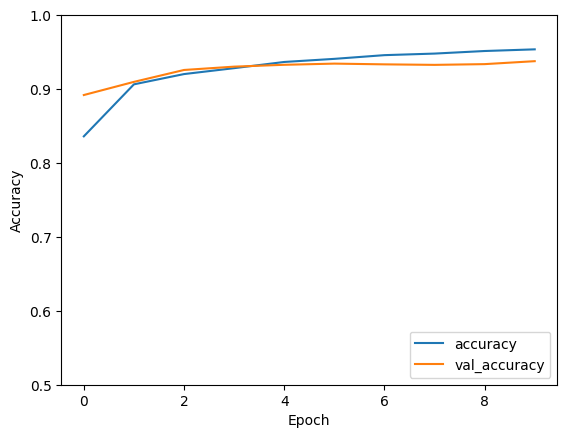

In [33]:
# Accuracy and Loss Plot

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(encode_test_X.reshape((len(encode_test_X), 8, 8)),  test_y, verbose=2)

In [37]:
pred = model.predict(encode_test_X.reshape((len(encode_test_X), 8, 8)))

pred_list = []

for i in range(pred.shape[0]):
  entry = np.zeros(pred[i].shape)
  entry[np.argmax(pred[i])] = 1
  pred_list.append(entry)

predictions = np.array(pred_list)

predictions

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
pred.shape

(10000, 10)

In [45]:
# Converting probabilities to one hot label 

encode_test_y = []

for i in range(test_y.shape[0]):
  entry = np.zeros(10) # 10 output classes
  entry[test_y[i]] = 1 # putting correct output class as 1
  encode_test_y.append(entry)

encode_test_y = np.array(encode_test_y)

In [48]:
encode_test_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
# Calculating Loss of the model over test set

from keras.losses import categorical_crossentropy

loss_val = categorical_crossentropy(encode_test_y, pred)

print('Loss of our Model on Test set is :')
print(np.mean(loss_val))

Loss of our Model on Test set is :
0.21372427


In [47]:
# Calculating accuracy of the model over test set

count = 0

for i in range(predictions.shape[0]):
  if np.argmax(predictions[i]) == np.argmax(encode_test_y[i]):
    count+=1

print('Accuracy of our Model on Test set is :')
print(count/encode_test_y.shape[0])

Accuracy of our Model on Test set is :
0.9377


In [49]:
# Creating the Confusion matrix with X-axis as Predicted and Y-axis as True 
confusion_matrix = np.zeros((10,10),dtype='int')

for i in range(predictions.shape[0]):
  confusion_matrix[np.argmax(encode_test_y[i])][np.argmax(predictions[i])] += 1

confusion_matrix

array([[ 950,    0,    4,    1,    5,    7,    5,    1,    3,    4],
       [   0, 1111,    4,    3,    1,    1,    2,    1,   12,    0],
       [   5,    2,  942,   26,    7,    3,    6,    8,   28,    5],
       [   2,    0,    8,  919,    1,   38,    2,    8,   29,    3],
       [   3,    1,    3,    1,  934,    2,    4,    2,    9,   23],
       [   4,    0,    0,   13,    4,  829,    6,    2,   27,    7],
       [   8,    2,    6,    0,   14,   19,  900,    0,    7,    2],
       [   0,    5,   12,    8,    8,    1,    1,  947,    4,   42],
       [   4,    1,    5,    8,    5,   21,    1,    6,  919,    4],
       [   3,    2,    2,    6,   32,   15,    1,   17,    5,  926]])

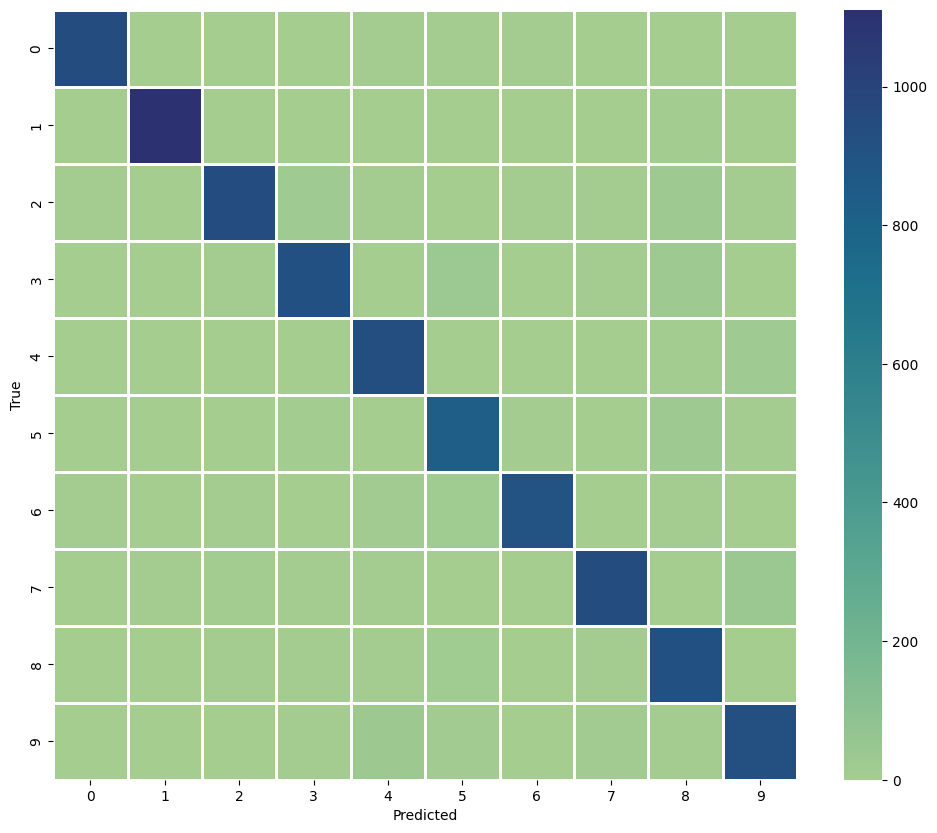

In [56]:
# Plotting the Confusion Matrix with the help of a Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)

ax = sns.heatmap(confusion_matrix, linewidth=0.8, cmap='crest')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()